<a href="https://colab.research.google.com/github/mili-b/PredictiveAnalytics/blob/main/Copy2_911_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [279]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")


# Read in and Examine the Data

In [280]:
df = pd.read_csv('https://raw.githubusercontent.com/mili-b/Data/main/911.csv')


In [281]:
# number of columns and rows
df.shape

(99492, 9)

In [282]:
# view data
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,12/10/2015 17:40,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,12/10/2015 17:40,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,12/10/2015 17:40,NORRISTOWN,HAWS AVE,1


In [283]:
# missing data in zip, twp and addr
df.isnull().sum()

lat              0
lng              0
desc             0
zip          12855
title            0
timeStamp        0
twp             43
addr           519
e                0
dtype: int64

In [284]:
# data types - timeStamp listed as object
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [285]:
# column desc seem to contain a combination of address, township, 
# station and date of call.  station and data seem to mix order
print(df['desc'].values)

['REINDEER CT & DEAD END;  NEW HANOVER; Station 332; 2015-12-10 @ 17:10:52;'
 'BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP; Station 345; 2015-12-10 @ 17:29:21;'
 'HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-Station:STA27;' ...
 'CHESTNUT ST & WALNUT ST;  NORRISTOWN; Station 308A; 2016-08-24 @ 11:07:31;'
 'WELSH RD & WEBSTER LN;  HORSHAM; Station 352; 2016-08-24 @ 11:13:19;'
 'MORRIS RD & S BROAD ST; UPPER GWYNEDD; 2016-08-24 @ 11:15:50;']


# Data Manipulation

#### split 'twp' into two - Dept and Reason

In [286]:
# split 'twp' into 'Dept' and 'Reason' for call - to allow analysis by each

##df['Dept'] = df['title'].apply(lambda x: x.split(':')[0])         #this works
df['Dept'] = df['title'].apply(lambda title: title.split(':')[0])

##df['Reason'] = df['title'].apply(lambda x: x.split(':')[1])        #this works
df['Reason'] = df['title'].apply(lambda title: title.split(':')[1])

In [287]:
#df.head(20)

In [288]:
# a closer look at the Reason column show vehicle accident listed in two forms
#  'VEHICLE ACCIDENT -', and ' VEHICLE ACCIDENT'
# Traffic dept calls appear to have a dash at the end as in 'VEHICLE ACCIDENT -'
# EMS dept calls appear to have no dash at the end as in 'VEHICLE ACCIDENT'

df['Reason'].unique()

array([' BACK PAINS/INJURY', ' DIABETIC EMERGENCY', ' GAS-ODOR/LEAK',
       ' CARDIAC EMERGENCY', ' DIZZINESS', ' HEAD INJURY',
       ' NAUSEA/VOMITING', ' RESPIRATORY EMERGENCY', ' SYNCOPAL EPISODE',
       ' VEHICLE ACCIDENT -', ' VEHICLE ACCIDENT', ' DISABLED VEHICLE -',
       ' APPLIANCE FIRE', ' GENERAL WEAKNESS',
       ' CARBON MONOXIDE DETECTOR', ' UNKNOWN MEDICAL EMERGENCY',
       ' UNRESPONSIVE SUBJECT', ' ALTERED MENTAL STATUS', ' FIRE ALARM',
       ' CVA/STROKE', ' ROAD OBSTRUCTION -', ' SUBJECT IN PAIN',
       ' HEMORRHAGING', ' FALL VICTIM', ' ASSAULT VICTIM', ' SEIZURES',
       ' MEDICAL ALERT ALARM', ' ABDOMINAL PAINS', ' PUMP DETAIL',
       ' FIRE INVESTIGATION', ' OVERDOSE', ' MATERNITY',
       ' UNCONSCIOUS SUBJECT', ' CHOKING', ' LACERATIONS',
       ' TRASH/DUMPSTER FIRE', ' UNKNOWN TYPE FIRE', ' BUILDING FIRE',
       ' ELECTRICAL FIRE OUTSIDE', ' DEBRIS/FLUIDS ON HIGHWAY',
       ' DEBRIS/FLUIDS ON HIGHWAY -', ' FEVER', ' ALLERGIC REACTION',
       ' VEH

In [289]:
# Remove dashes to get a better view/count of each cause

df['Reason'] = df.title.str.split(':', expand=True)[0]
df['Reason'] = df.title.str.split(':', expand=True)[1].str.replace(' -', '')

In [290]:
#notice - vehicle accident is listed only once now

df['Reason'].unique()

array([' BACK PAINS/INJURY', ' DIABETIC EMERGENCY', ' GAS-ODOR/LEAK',
       ' CARDIAC EMERGENCY', ' DIZZINESS', ' HEAD INJURY',
       ' NAUSEA/VOMITING', ' RESPIRATORY EMERGENCY', ' SYNCOPAL EPISODE',
       ' VEHICLE ACCIDENT', ' DISABLED VEHICLE', ' APPLIANCE FIRE',
       ' GENERAL WEAKNESS', ' CARBON MONOXIDE DETECTOR',
       ' UNKNOWN MEDICAL EMERGENCY', ' UNRESPONSIVE SUBJECT',
       ' ALTERED MENTAL STATUS', ' FIRE ALARM', ' CVA/STROKE',
       ' ROAD OBSTRUCTION', ' SUBJECT IN PAIN', ' HEMORRHAGING',
       ' FALL VICTIM', ' ASSAULT VICTIM', ' SEIZURES',
       ' MEDICAL ALERT ALARM', ' ABDOMINAL PAINS', ' PUMP DETAIL',
       ' FIRE INVESTIGATION', ' OVERDOSE', ' MATERNITY',
       ' UNCONSCIOUS SUBJECT', ' CHOKING', ' LACERATIONS',
       ' TRASH/DUMPSTER FIRE', ' UNKNOWN TYPE FIRE', ' BUILDING FIRE',
       ' ELECTRICAL FIRE OUTSIDE', ' DEBRIS/FLUIDS ON HIGHWAY', ' FEVER',
       ' ALLERGIC REACTION', ' VEHICLE LEAKING FUEL', ' FRACTURE',
       ' BURN VICTIM', ' RESCUE 

In [291]:
#df.head(20)

#### change 'timeStamp' to datetime and deconstruct

In [292]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [293]:
print(df['timeStamp'])

0       2015-12-10 17:40:00
1       2015-12-10 17:40:00
2       2015-12-10 17:40:00
3       2015-12-10 17:40:00
4       2015-12-10 17:40:00
                ...        
99487   2016-08-24 11:06:00
99488   2016-08-24 11:07:00
99489   2016-08-24 11:12:00
99490   2016-08-24 11:17:00
99491   2016-08-24 11:17:00
Name: timeStamp, Length: 99492, dtype: datetime64[ns]


In [294]:
# deconstruct 'timestamp' into year, month, day, hour - to facilite analysis 
# by these components - example - to find most calls by month, day, hour etc

df['Hour'] = df.timeStamp.dt.hour
df['Weekday'] = df.timeStamp.dt.weekday
df['Month'] = df.timeStamp.dt.month
df['Year'] = df.timeStamp.dt.year
df['Date']=df["timeStamp"].dt.date
df['Time']=df["timeStamp"].dt.time

df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Dept,Reason,Hour,Weekday,Month,Year,Date,Time
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,17,3,12,2015,2015-12-10,17:40:00
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,17,3,12,2015,2015-12-10,17:40:00


In [295]:
#change day of week from numbers to names using map funtion
# dictionary string names:

daymap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thur', 4:'Fri', 5:'Sat', 6:'Sun'}
df['Weekday'] = df['Weekday'].map(daymap)

In [296]:
#change month from numbers to names using map funtion
# dictionary string names:

monthmap = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
df['Month'] = df['Month'].map(monthmap)

In [297]:
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Dept,Reason,Hour,Weekday,Month,Year,Date,Time
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,17,Thur,Dec,2015,2015-12-10,17:40:00
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,17,Thur,Dec,2015,2015-12-10,17:40:00


# EDA

### which Dept handled the most call

In [298]:
# EMS handled most calls, followed by Traffic then fire dept

df.groupby(['Dept'])['Dept'].count().sort_values(ascending=False)

Dept
EMS        48877
Traffic    35695
Fire       14920
Name: Dept, dtype: int64

In [299]:
## yield same results:
# print(df.Dept.value_counts())
# print(df.Dept.nunique())

### what are the top reasons each dept was called

In [344]:
df['Reason'].nunique()

76

In [300]:
#df.groupby(df[df['Dept'] == 'EMS'])['Reason'].count().sort_values(ascending=False).head(5)

In [301]:
#top reasons each dept was called

# df.groupby(['Dept'])['Dept'].count().sort_values(ascending=False)

df.groupby(['Dept','Reason'])['Reason'].count()

Dept     Reason                    
EMS       ABDOMINAL PAINS               1436
          ACTIVE SHOOTER                   2
          ALLERGIC REACTION              438
          ALTERED MENTAL STATUS         1386
          AMPUTATION                      14
                                       ...  
Traffic   HAZARDOUS ROAD CONDITIONS     1086
          ROAD OBSTRUCTION              3144
          VEHICLE ACCIDENT             23066
          VEHICLE FIRE                   553
          VEHICLE LEAKING FUEL            77
Name: Reason, Length: 110, dtype: int64

In [302]:


# DeptReason = df.groupby(by=['Dept','Reason']).count()['Reason']
# DeptReason.head()

### what were the top 5 reasons for call

In [303]:
# vehichle accidents, disabled vehicle, fire alarm, respiratory emergency and cardiac emergency
df.groupby(['Reason'])['Reason'].count().sort_values(ascending=False).head(5)

Reason
 VEHICLE ACCIDENT         28639
 DISABLED VEHICLE          7703
 FIRE ALARM                5510
 RESPIRATORY EMERGENCY     5112
 CARDIAC EMERGENCY         5012
Name: Reason, dtype: int64

In [304]:
## yield same results:
# print(df.Reason.value_counts())
# print(df.Reason.nunique())

### explore Vehicle Accidents
###which vehicle accidents involved EMS - suggesting possible injuries

In [305]:
dfEMS = df[df['Dept'] == 'EMS']
#dfEMS

In [306]:
# EMS responded to 3,935 vehicle accidents - the fourth leading cause of EMS response

dfEMS.groupby(['Reason'])['Reason'].count().sort_values(ascending=False).head(5)

Reason
 RESPIRATORY EMERGENCY    5112
 CARDIAC EMERGENCY        5012
 FALL VICTIM              4863
 VEHICLE ACCIDENT         3935
 SUBJECT IN PAIN          2687
Name: Reason, dtype: int64

### where are the accidents occuring - by township, zip, address

In [337]:

dfVehAcc = df[df['Reason'] == ' VEHICLE ACCIDENT']
dfVehAcc.head(2)


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Dept,Reason,Hour,Weekday,Month,Year,Date,Time
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:00,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1,Traffic,VEHICLE ACCIDENT,17,Thur,Dec,2015,2015-12-10,17:40:00
10,40.231990,-75.251891,RT202 PKWY & KNAPP RD; MONTGOMERY; 2015-12-10 ...,NaN,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:00,MONTGOMERY,RT202 PKWY & KNAPP RD,1,Traffic,VEHICLE ACCIDENT,17,Thur,Dec,2015,2015-12-10,17:40:00


In [339]:
# 68 unique townships

df['twp'].nunique()

68

In [340]:
# although LOWER AND UPPER MERION have the highest number of vehicle accidents,
# vehicle accidents do not appear to be highly concentrated in these townships.
# about 9.7% of all vehicle accidents occur in Lower Merion
# and 6.9% in Upper Merion

dfVehAcc.groupby(['twp'])['twp'].count().sort_values(ascending=False).head(5)

twp
LOWER MERION    2788
UPPER MERION    1981
ABINGTON        1541
CHELTENHAM      1434
NORRISTOWN      1164
Name: twp, dtype: int64

In [341]:
# similarly no extreme vehicle accident concentration by zip

dfVehAcc.groupby(['zip'])['zip'].count().sort_values(ascending=False).head(5)

zip
19401.0    1426
19464.0    1317
19446.0    1205
19403.0    1017
19454.0     949
Name: zip, dtype: int64

In [342]:
# similarly no extreme vehicle accident concentration by address/intersection

dfVehAcc.groupby(['addr'])['addr'].count().sort_values(ascending=False).head(5)

addr
SCHUYLKILL EXPY & WEADLEY RD OVERPASS             125
SCHUYLKILL EXPY & CONSHOHOCKEN STATE UNDERPASS    113
SCHUYLKILL EXPY & CROTON RD UNDERPASS             102
BETHLEHEM PIKE & NORTH WALES RD                    96
SCHUYLKILL EXPY & WAVERLY RD UNDERPASS             89
Name: addr, dtype: int64

### what time period did the data cover

In [308]:
# data starts Dec 10, 2015 at 5:40 pm and ends August 24, 2016 at 11:17 am
#

df['Year'].unique()

array([2015, 2016])

In [309]:
df['timeStamp'].min()

Timestamp('2015-12-10 17:40:00')

In [310]:
df['timeStamp'].max()

Timestamp('2016-08-24 11:17:00')

In [311]:
df['Date'].min()

datetime.date(2015, 12, 10)

In [312]:
df['Date'].max()

datetime.date(2016, 8, 24)

### which months, days, dates, hours saw the most calls

In [313]:
df['Month'].unique()

array(['Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug'],
      dtype=object)

In [314]:
# while january and july had most calls, the calls were reasonably distributed
# over the months
# Aughust and December had fewer calls because calls were not recorded for the full months

df.groupby(['Month'])['Month'].count().sort_values(ascending=False).head(10)

Month
Jan    13205
Jul    12137
Jun    11786
Feb    11467
May    11423
Apr    11326
Mar    11101
Aug     9078
Dec     7969
Name: Month, dtype: int64

In [315]:
# January 23, 2016 had significantly more calls than othere dates

df.groupby(['Date'])['Date'].count().sort_values(ascending=False).head(10)

Date
2016-01-23    913
2016-02-24    679
2016-01-24    662
2016-01-12    588
2016-04-03    586
2016-07-25    580
2016-01-25    575
2016-02-16    560
2016-02-15    541
2015-12-23    524
Name: Date, dtype: int64

(array([735933., 735964., 735995., 736024., 736055., 736085., 736116.,
        736146., 736177., 736208.]),
 <a list of 10 Text major ticklabel objects>)

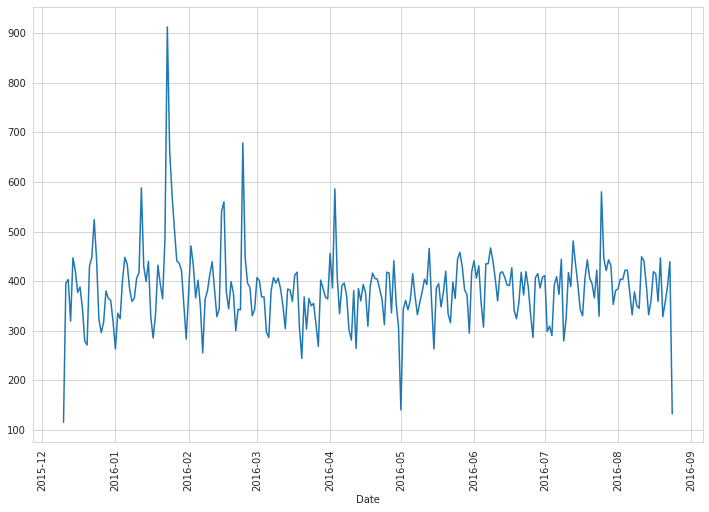

In [351]:
# daily call volume
# most days calls average between 250 and about 475
# 7 days when calls exceed 500 
# 3 days when calls were fewer than 200

plt.figure(figsize=(12, 8))
df.groupby(['Date'])['Date'].count().plot()
plt.xticks(rotation=90)

In [316]:
# weekends saw fewer calls
# tuesday has the most calls

df.groupby(['Weekday'])['Weekday'].count().sort_values(ascending=False)

Weekday
Tue     15150
Wed     14879
Fri     14833
Mon     14680
Thur    14478
Sat     13336
Sun     12136
Name: Weekday, dtype: int64

In [317]:

df['Hour'].unique()

array([17, 18, 19, 20, 21, 22, 23,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       10, 11, 12, 13, 14, 15, 16])

In [318]:
# most calls seem to occur between about 8 am (hour 8) to about 8 pm (hour 20)

df.groupby(['Hour'])['Hour'].count()

Hour
0     2112
1     1721
2     1549
3     1435
4     1418
5     1629
6     2513
7     3970
8     5044
9     5314
10    5413
11    5543
12    6029
13    5967
14    5997
15    6154
16    6490
17    6517
18    5762
19    4908
20    4377
21    3788
22    3283
23    2559
Name: Hour, dtype: int64

In [319]:
# most calls occcur in the afternoon - about 3 -5 pm
df.groupby(['Hour'])['Hour'].count().sort_values(ascending=False)

Hour
17    6517
16    6490
15    6154
12    6029
14    5997
13    5967
18    5762
11    5543
10    5413
9     5314
8     5044
19    4908
20    4377
7     3970
21    3788
22    3283
23    2559
6     2513
0     2112
1     1721
5     1629
2     1549
3     1435
4     1418
Name: Hour, dtype: int64

In [320]:
# consistent with above analyses, hours 16 -17 have more calls

df.groupby(['Time'])['Time'].count().sort_values(ascending=False).head(10)

Time
16:22:00    505
16:47:00    485
17:22:00    481
17:42:00    468
17:52:00    468
17:37:00    465
17:57:00    464
16:02:00    460
16:07:00    456
18:02:00    455
Name: Time, dtype: int64

In [321]:
# group by weekday and hour

In [322]:
WkdayHrDistr = df.groupby(by=['Weekday','Hour']).count()['Reason']
WkdayHrDistr.head()

Weekday  Hour
Fri      0       275
         1       235
         2       191
         3       175
         4       201
Name: Reason, dtype: int64

In [323]:

WkdayHrDistr = df.groupby(by=['Weekday','Hour']).count()['Reason'].unstack()
WkdayHrDistr.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Weekday,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thur,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


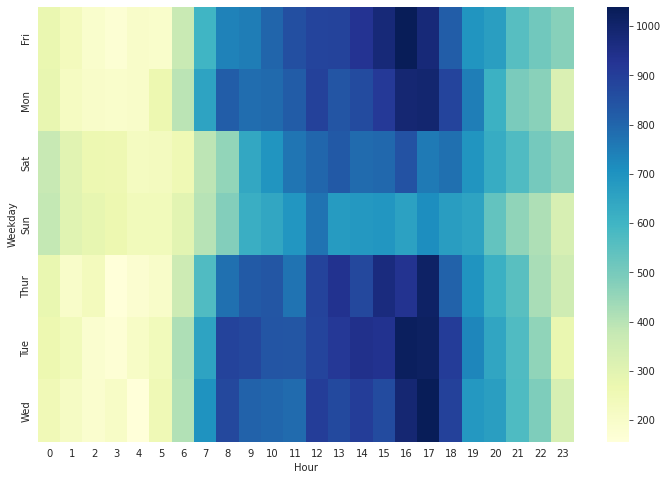

In [324]:
#
# heatmap of weekday and hour confirms the above analyses that:
# fewer calls on Saturdays and Sundays - lighter colors
# most calls between 8 am to about 6 pm (hours 8 - 18)
# most calls in the afternoons - about 4-5 pm (hours 16-17)
# least calls from 11 pm - 5 am ( hour 23 - hour 5)

plt.figure(figsize=(12, 8))
sns.heatmap(WkdayHrDistr, cmap="YlGnBu")

### are there addresses/intersections from which multiple calls originate

In [325]:
# Address is not unique - suggesting there are addresses from which
# multiple calls originate

df['addr'].is_unique

False

In [326]:
# there are 99,492 data points but only 21,930 unique addresses - suggesting 
# there are multiple addresses/intersections from which calls originate

df['addr'].nunique()

21914

In [327]:
# SHANNONDELL DR & SHANNONDELL BLVD is the address/intersection with the 
# highest number of calls - by far

df['addr'].value_counts().head(5)

SHANNONDELL DR & SHANNONDELL BLVD    938
MAIN ST & OLD SUMNEYTOWN PIKE        390
THE FAIRWAY  & RYDAL RD              260
GULPH RD & KIRK AVE                  235
EVERGREEN RD & W LIGHTCAP RD         232
Name: addr, dtype: int64

In [328]:
# Explore what is happening at SHANNONDELL DR & SHANNONDELL BLVD
# example - to see if intersection prone to traffic accidents
# dataframe this address

df2 = df[df['addr'] == 'SHANNONDELL DR & SHANNONDELL BLVD']
df2.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Dept,Reason,Hour,Weekday,Month,Year,Date,Time
25,40.133037,-75.408463,SHANNONDELL DR & SHANNONDELL BLVD; LOWER PROV...,19403.0,EMS: GENERAL WEAKNESS,2015-12-10 18:06:00,LOWER PROVIDENCE,SHANNONDELL DR & SHANNONDELL BLVD,1,EMS,GENERAL WEAKNESS,18,Thur,Dec,2015,2015-12-10,18:06:00
57,40.133037,-75.408463,SHANNONDELL DR & SHANNONDELL BLVD; LOWER PROV...,19403.0,EMS: CVA/STROKE,2015-12-10 19:26:00,LOWER PROVIDENCE,SHANNONDELL DR & SHANNONDELL BLVD,1,EMS,CVA/STROKE,19,Thur,Dec,2015,2015-12-10,19:26:00


In [329]:
# group this address by department response
# most of the calls at this intersection is for EMS - surprisingly none for traffic

df2.groupby(['Dept'])['Dept'].count()

Dept
EMS     914
Fire     24
Name: Dept, dtype: int64

In [330]:
# reasons called for this address/intersection
# most reasons listed could possibly indicate an aging population - BUT
# research indicates only 10% of the population is over 65 years and the 
# median age is only 36
# maybe it's more densely populated than other intersections

df2.groupby(['Reason'])['Reason'].count().sort_values(ascending = False).head(10)

Reason
 MEDICAL ALERT ALARM      267
 FALL VICTIM              211
 CARDIAC EMERGENCY         78
 RESPIRATORY EMERGENCY     75
 SUBJECT IN PAIN           39
 ALTERED MENTAL STATUS     31
 HEAD INJURY               30
 CVA/STROKE                25
 GENERAL WEAKNESS          22
 FIRE ALARM                21
Name: Reason, dtype: int64